# 0. Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
# for path in paths.values():
#     if not os.path.exists(path):
#         if os.name == 'posix':
#             !mkdir -p {path}
#         if os.name == 'nt':
#             !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [ ]:
# https://www.tensorflow.org/install/source_windows

In [ ]:
# if os.name=='nt':
#     !pip install wget
#     import wget

In [6]:
# if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
#     !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow/models'...
remote: Enumerating objects: 78967, done.
remote: Counting objects: 100% (308/308), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 78967 (delta 152), reused 283 (delta 140), pack-reused 78659
Receiving objects: 100% (78967/78967), 593.86 MiB | 18.95 MiB/s, done.
Resolving deltas: 100% (56133/56133), done.
Checking out files: 100% (3243/3243), done.


In [7]:
# # Install Tensorflow Object Detection 
# if os.name=='posix':  
#     !apt-get install protobuf-compiler
#     !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
# if os.name=='nt':
#     url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
#     wget.download(url)
#     !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
#     !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
#     os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
#     !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
#     !cd Tensorflow/models/research/slim && pip install -e . 

/bin/bash: apt-get: command not found
Processing /home/dheeraj20194/new_ip/Tensorflow/models/research
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 457.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 1.5 MB/s eta 0:00:00a 0:00:01
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1655041 sha256=70ed1132ab5b85f1913b56b991136b98514557c5fd519c443b38d0a8c689b6e1
  Stored in directory: /tmp/pip-ephem-wheel-cache-xocf2qlc/wheels/f8/4d/8b/42cd025b4e75a0eb09bb15fa18841185341b8bc24a54a19191
Successfully built object-detection
  Attempting uninstall: sacrebleu
    Found existing installation: sacrebleu 2.2.1
    Uninstalling sacrebleu-2.2.1:
      Successfully uninstalled sacrebleu-2.2.1
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9


In [ ]:
# !pip list

In [6]:
# VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# # Verify Installation
# !python {VERIFICATION_SCRIPT}

Running tests under Python 3.9.13: /home/dheeraj20194/.conda/envs/dheeraj_newip/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-11-21 03:09:29.730484: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 625 MB memory:  -> device: 0, name: GeForce RTX 3090, pci bus id: 0000:04:00.0, compute capability: 8.6
/home/dheeraj20194/.conda/envs/dheeraj_newip/lib/python3.9/site-packages/object_detection/builders/model_builder.py:1109: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building experimental DeepMAC meta-arch.'
W1121 03:09:30.115007 140358155335488 model_builder.py:1109] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.7s
I1121 03:09:30.501657 140358155335488 test_util.py:2458] time(__main__.ModelBuilderTF2Test.test_create_center_net

In [ ]:
# !pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 --upgrade

In [ ]:
# !pip uninstall protobuf matplotlib -y
# !pip install protobuf matplotlib==3.2

In [8]:
# import object_detection

In [8]:
# if os.name =='posix':
#     !wget {PRETRAINED_MODEL_URL}
#     !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
#     !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
# if os.name == 'nt':
#     wget.download(PRETRAINED_MODEL_URL)
#     !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
#     !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2022-11-21 03:10:31--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org... 142.250.76.176, 2404:6800:4009:81e::2010
Connecting to download.tensorflow.org|142.250.76.176|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  27.8MB/s    in 0.7s    

2022-11-21 03:10:32 (27.8 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite

# 2. Create Label Map

In [5]:
labels = [{'name':'licence', 'id':1}]

# with open(files['LABELMAP'], 'w') as f:
#     for label in labels:
#         f.write('item { \n')
#         f.write('\tname:\'{}\'\n'.format(label['name']))
#         f.write('\tid:{}\n'.format(label['id']))
#         f.write('}\n')

# 3. Create TF records

In [ ]:
# # OPTIONAL IF RUNNING ON COLAB
# ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
# if os.path.exists(ARCHIVE_FILES):
#   !tar -zxvf {ARCHIVE_FILES}

In [12]:
# if not os.path.exists(files['TF_RECORD_SCRIPT']):
#     !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow/scripts'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 1 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [20]:
# !python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
# !python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


# 4. Copy Model Config to Training Folder

In [10]:
# if os.name =='posix':
#     !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
# if os.name == 'nt':
#     !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config For Transfer Learning

In [6]:
# import tensorflow as tf
# from object_detection.utils import config_util
# from object_detection.protos import pipeline_pb2
# from google.protobuf import text_format

In [7]:
# config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [ ]:
# config

In [7]:
# pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
# with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
#     proto_str = f.read()                                                                                                                                                                                                                                          
#     text_format.Merge(proto_str, pipeline_config)  

In [8]:
# pipeline_config.model.ssd.num_classes = len(labels)
# pipeline_config.train_config.batch_size = 4
# pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
# pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
# pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
# pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
# pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
# pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

NameError: name 'labels' is not defined

In [14]:
# config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
# with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
#     f.write(config_text)   

# 6. Train the model

In [6]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [7]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=20000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [17]:
# print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=20000


In [18]:
# !{command}

2022-11-21 03:52:39.110520: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13541 MB memory:  -> device: 0, name: GeForce RTX 3090, pci bus id: 0000:04:00.0, compute capability: 8.6
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I1121 03:52:39.369176 140195568375616 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 20000
I1121 03:52:39.375429 140195568375616 config_util.py:552] Maybe overwriting train_steps: 20000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1121 03:52:39.375571 140195568375616 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W1121 03:52:39.409955 140195568375616 deprecation.py:350] From /home/dheeraj20194/.conda/envs/dheeraj_newip/lib/python3.9/s

# 7. Evaluate the Model

In [19]:
# command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [20]:
# print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet


In [21]:
# !{command}

W1121 04:29:24.523963 140232123860800 model_lib_v2.py:1089] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I1121 04:29:24.524199 140232123860800 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1121 04:29:24.524315 140232123860800 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I1121 04:29:24.524437 140232123860800 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W1121 04:29:24.524599 140232123860800 model_lib_v2.py:1106] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2022-11-21 04:29:25.389894: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13541 MB memory:  -> device: 0, name: GeForce RTX 309

# 8. Load Train Model From Checkpoint

In [5]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [6]:
# Prevent GPU complete consumption
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try: 
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=8120)])
    except RunTimeError as e:
        print(e)

In [7]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)
# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-21')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

2022-12-23 15:27:21.574306: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8120 MB memory:  -> device: 0, name: GeForce RTX 3090, pci bus id: 0000:04:00.0, compute capability: 8.6


# 9. Detect from an Image

In [8]:
import numpy as np
import easyocr
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

/home/dheeraj20194/.conda/envs/dheeraj_new_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [10]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test','WhatsApp Image 2022-11-10 at 11.37.29 AM.jpeg')

In [11]:
def Text_Processing(text):
    text = text.replace(' ', '')
    text = text.upper()
    return text

In [12]:
#temp trying
import csv
import uuid
import datetime
import pandas as pd

def save_results_temp(text, csv_filename, folder_path, frame):
    text = Text_Processing(text)
    img_name = '{}.jpg'.format(uuid.uuid1())
    # Read and search if text already exists in 2nd column of csv file
    my_read = []
    flag = 0
    with open(csv_filename, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            if text in row and row[3] == "":
                row[3] = datetime.datetime.now()
                flag = 1
            my_read.append(row)
    f.close()

    if flag == 0:
        data = [img_name, text, datetime.datetime.now(),""]
        my_read.append(data)

    with open(csv_filename, 'w+') as f:
        writer = csv.writer(f)
        writer.writerows(my_read)
    f.close()

In [13]:
def filter_text(region, ocr_result, region_threshold):
    rectangle_size = region.shape[0]*region.shape[1]
    plate = [] 
    for result in ocr_result:
        length = np.sum(np.subtract(result[0][1], result[0][0]))
        height = np.sum(np.subtract(result[0][2], result[0][1]))
        
        if length*height / rectangle_size > region_threshold:
            plate.append(result[1])
    return plate

In [14]:
def sharpen_image(image):
    kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
    image_sharp = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
    return image_sharp

In [20]:
def ocr_it_temp(image, detections, detection_threshold, region_threshold):
    
    # Scores, boxes and classes above threhold
    scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    # classes = detections['detection_classes'][:len(scores)] 

    # Full image dimensions
    width = image.shape[1]
    height = image.shape[0] 

    # Apply ROI filtering and OCR
    for _, box in enumerate(boxes):
        roi = box*[height, width, height, width]
        region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
        
        reader = easyocr.Reader(['en'])
        
        ocr_result = reader.readtext(region)
        
        text = filter_text(region, ocr_result, region_threshold)
        
        if text is None or len(text) == 0:
            print("None")
        else:
            print(text)
        plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
        plt.show()
        return text

In [29]:
def ocr_it(image, detections, detection_threshold, region_threshold):
    
    # Scores, boxes and classes above threhold
    scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    # classes = detections['detection_classes'][:len(scores)] 

    # Full image dimensions
    width = image.shape[1]
    height = image.shape[0]
    ocr_result = None

    # Apply ROI filtering and OCR
    for _, box in enumerate(boxes):
        roi = box*[height, width, height, width]
        region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
        region = sharpen_image(region)

        reader = easyocr.Reader(['en'])
        ocr_result = reader.readtext(region)
        
        text = filter_text(region, ocr_result, region_threshold)


        if text is None or len(text) == 0:
            print("None")
        else:
            temp = text[0].replace("?", "7")
            temp = temp.replace("[", "")
            temp = temp.replace("]", "")
            text = [temp]
            print(text)
        plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
        plt.show()
        return text

In [30]:
import socket, cv2, pickle, struct
from statistics import mode
import datetime

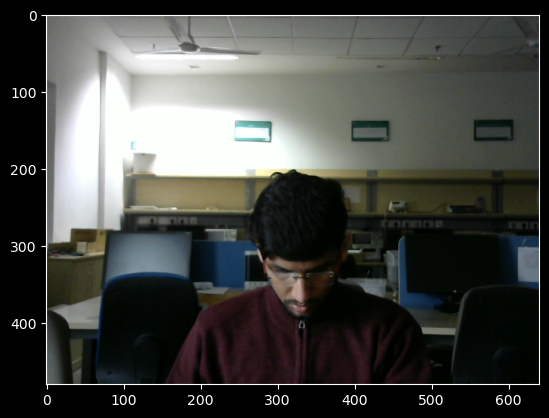

['695299']


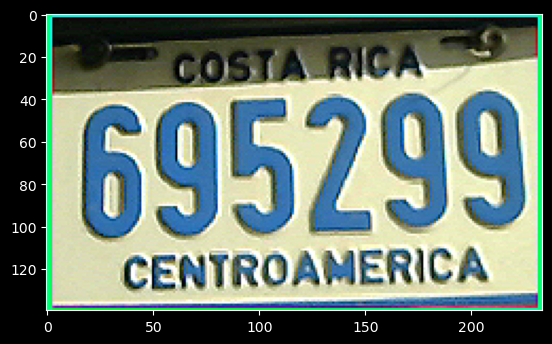

['695299']


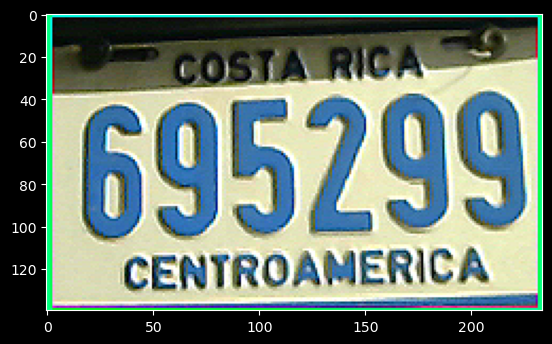

['695299']


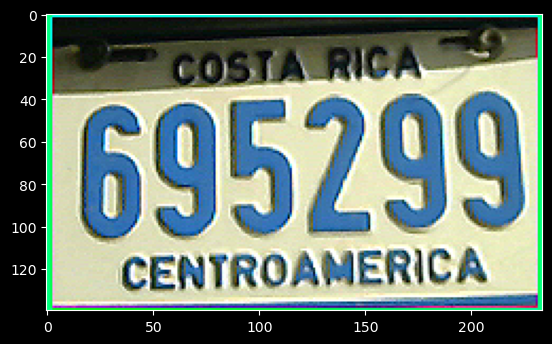

['695299']


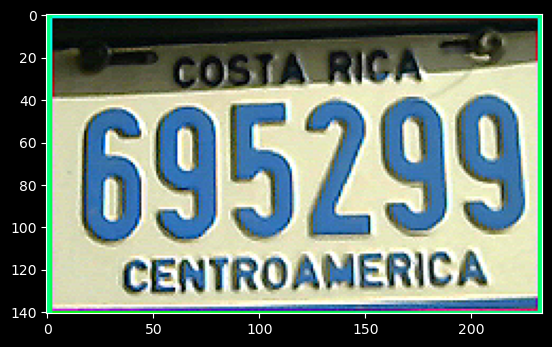

['695299']


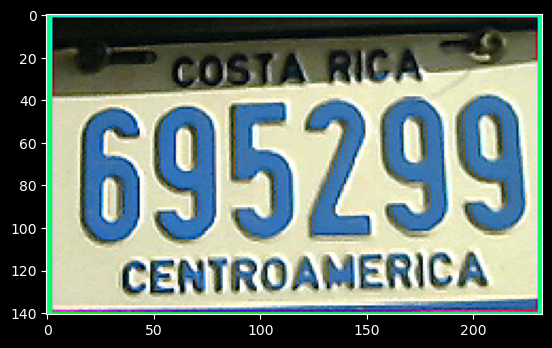

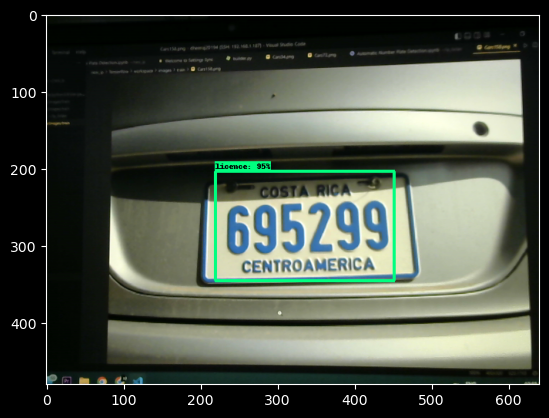

['KL54 4 2670']


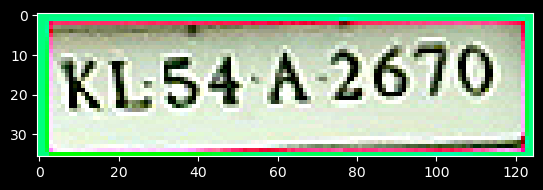

['KL54 A 2670']


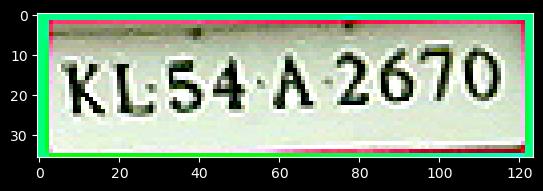

['KL54A 2670']


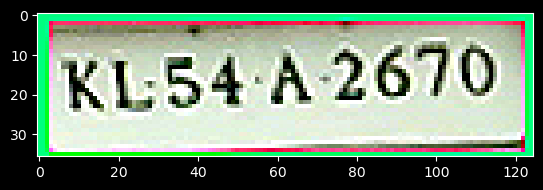

['KL54 A 2670']


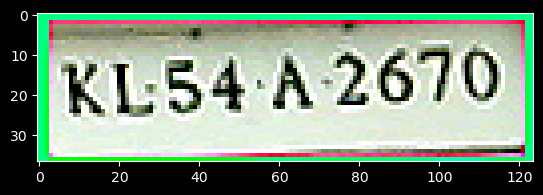

['KL54A 2670']


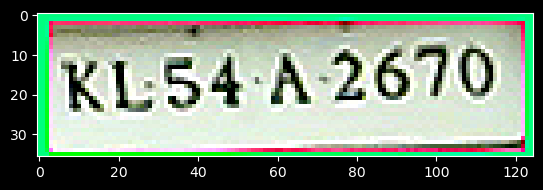

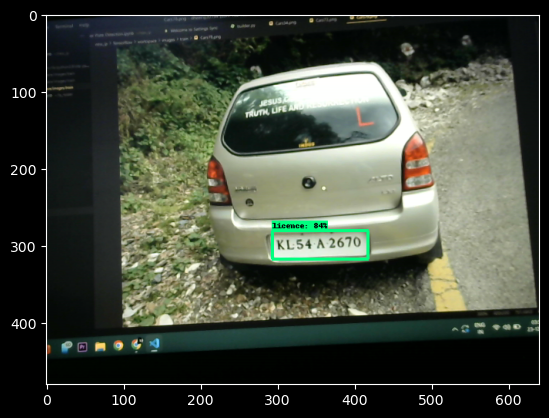

['CHOIAL']


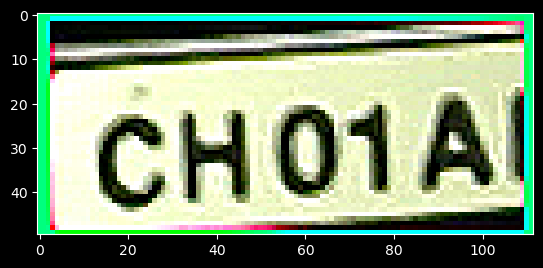

['CHOIA']


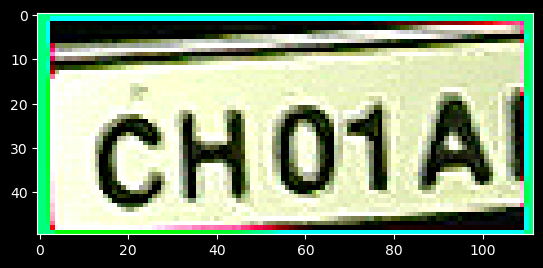

['CHOIAL']


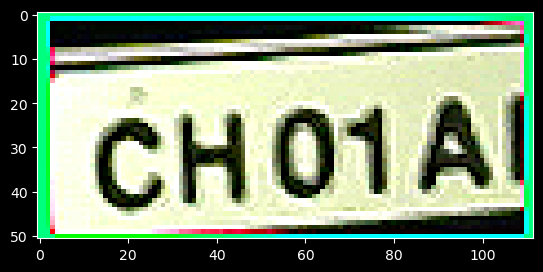

['CHOIAL']


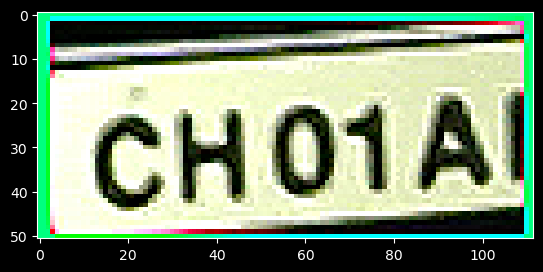

['CHOIAL']


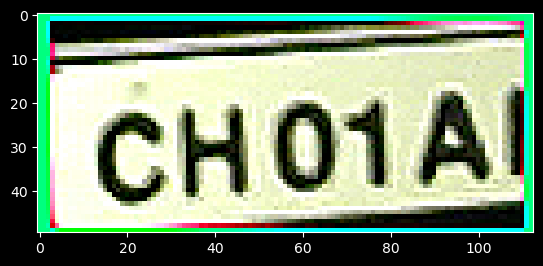

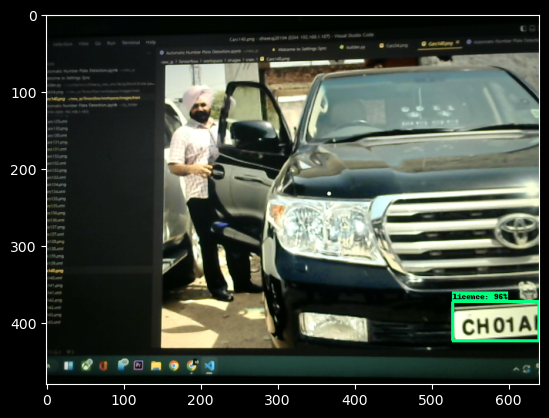

None


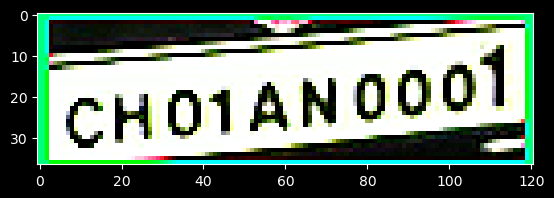

None


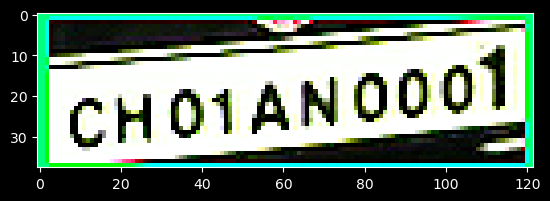

None


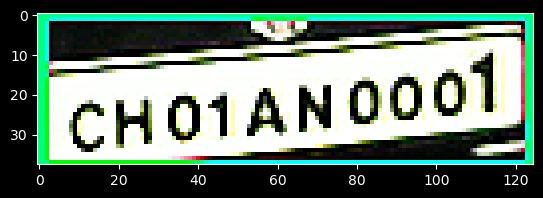

['Cho1AnOOO1']


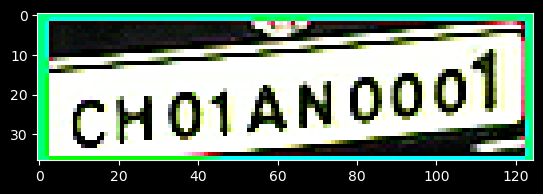

None


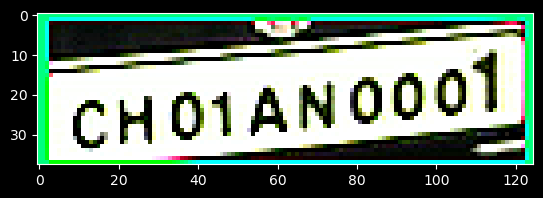

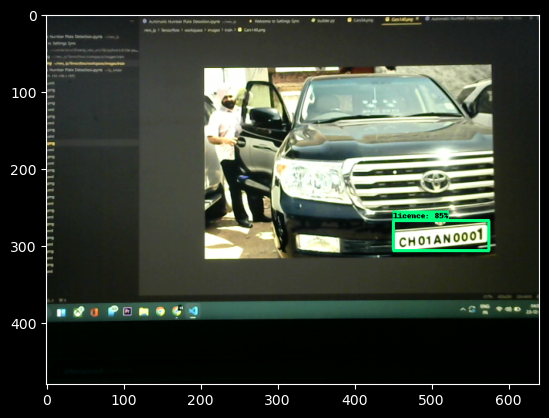

None


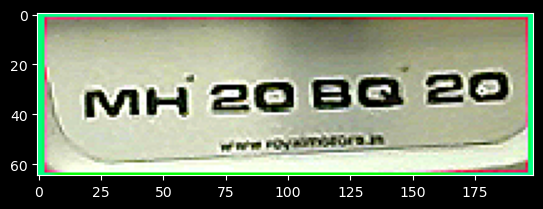

None


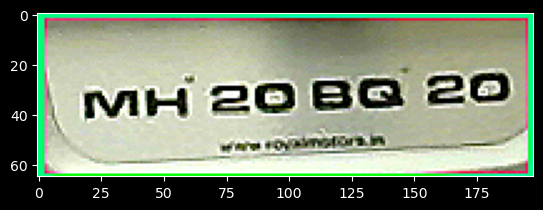

None


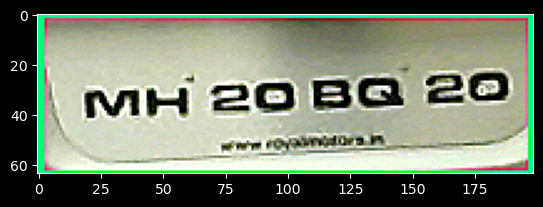

None


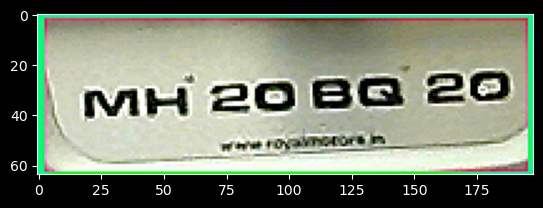

None


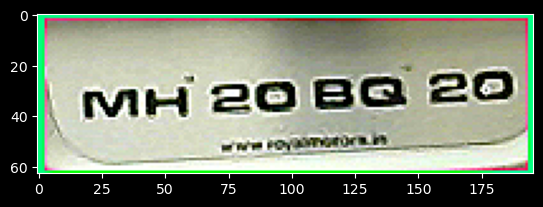

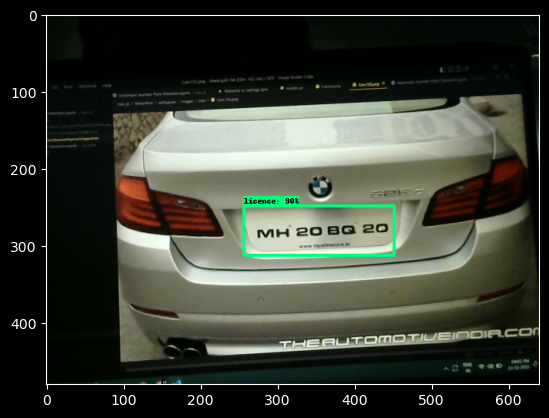

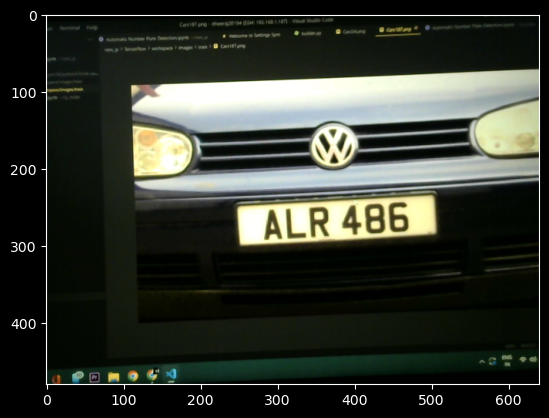

None


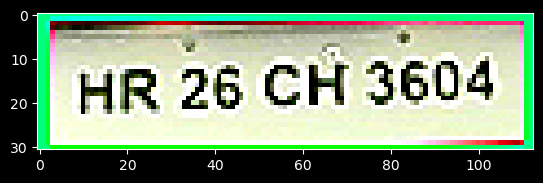

['HR 26 CH 3604']


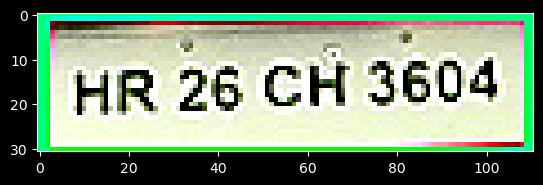

None


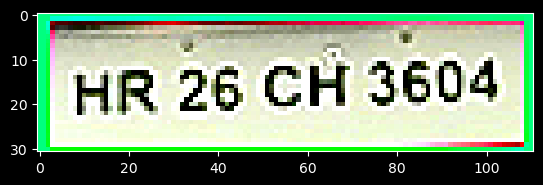

['HR 26 CH 3604']


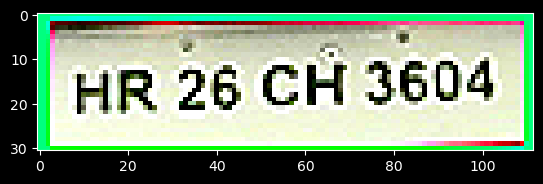

None


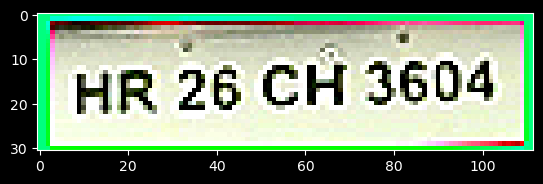

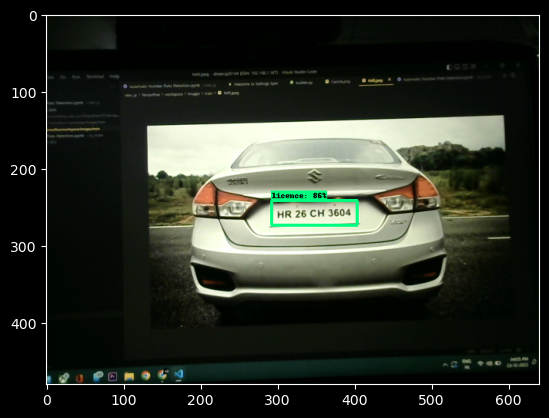

['MH:V E759"']


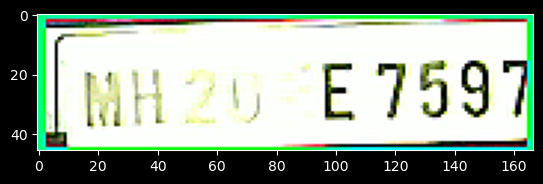

None


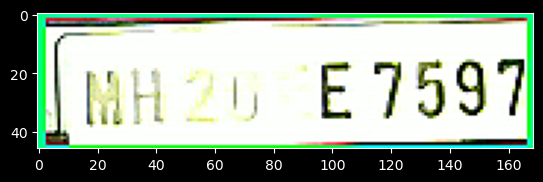

None


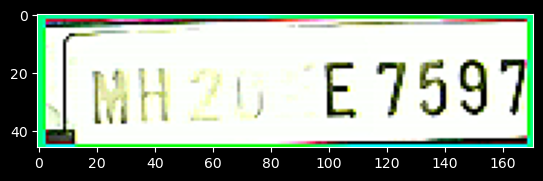

None


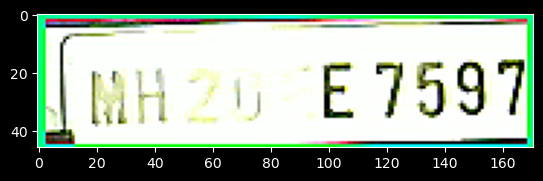

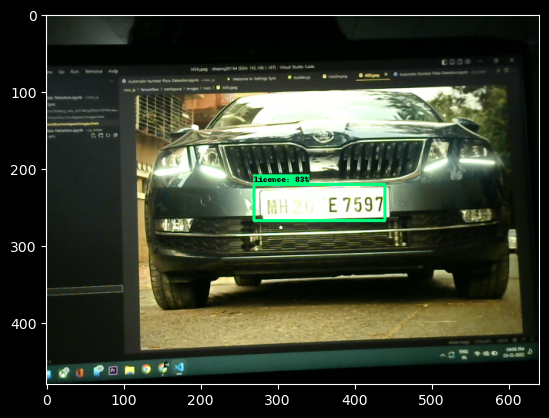

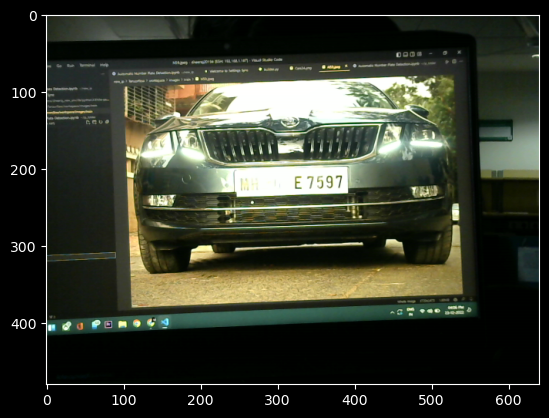

['TW52 U1580']


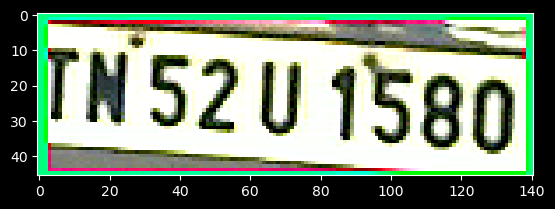

['TN52 U 1580']


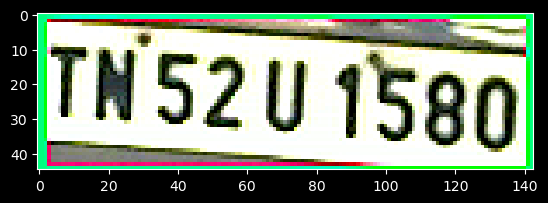

['TW52 U 1580']


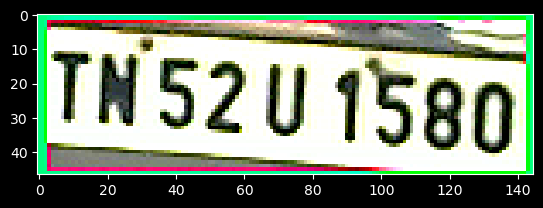

None


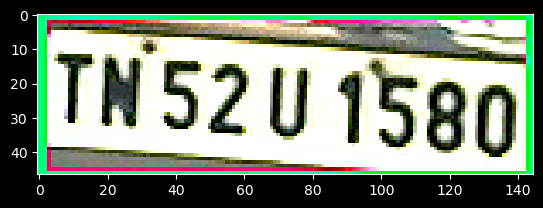

['T52 U1580']


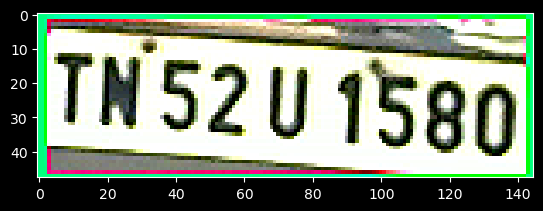

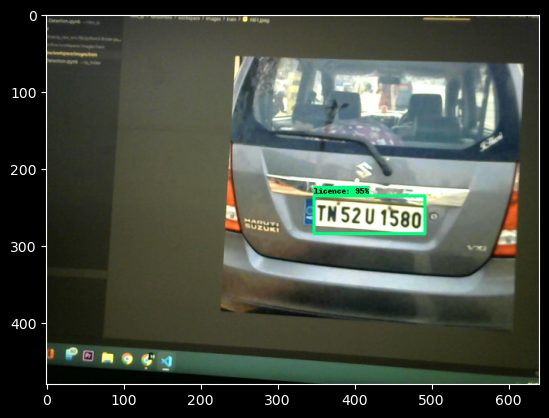

['Itn52 U 1580']


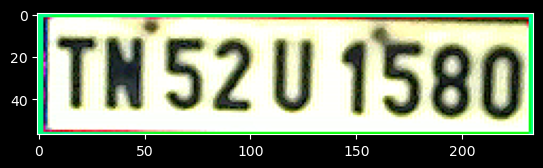

['(tn5z U 1580']


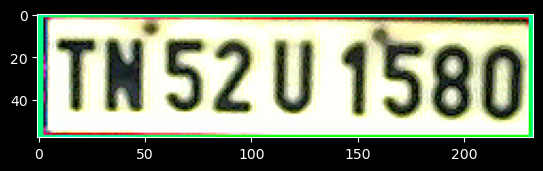

['Itr 52 U 1580']


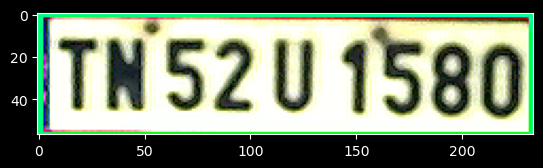

['TN52U 1580']


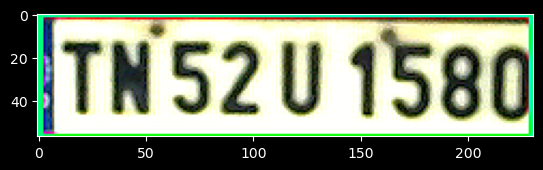

['TN52U 1580']


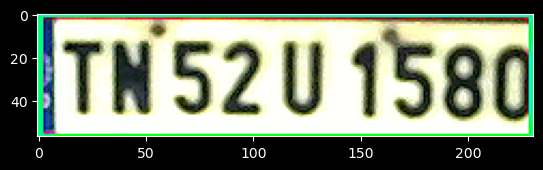

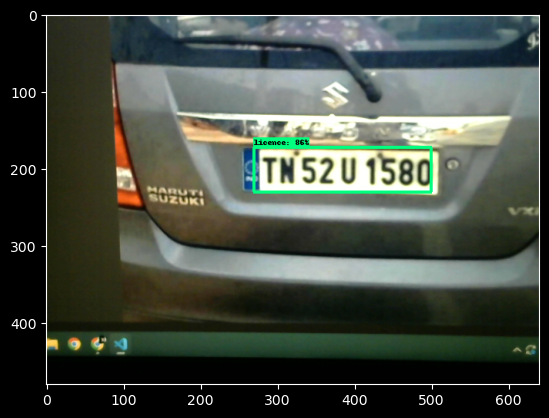

KeyboardInterrupt: 

In [31]:
# create socket
client_socket = socket.socket(socket.AF_INET,socket.SOCK_STREAM)
host_ip, port = '192.168.172.249', 2001
client_socket.connect((host_ip, port))

data = b""
payload_size = struct.calcsize("Q")

i = 0
while i >= 0:
	My_text = []
	for _ in range(5):

		while len(data) < payload_size:
			packet = client_socket.recv(4*1024)
			if not packet: break
			data+=packet

		packed_msg_size = data[:payload_size]
		data = data[payload_size:]
		msg_size = struct.unpack("Q", packed_msg_size)[0]
		
		while len(data) < msg_size:
			data += client_socket.recv(4*1024)

		frame_data = data[:msg_size]
		data  = data[msg_size:]
		frame = pickle.loads(frame_data)

		cv2.imwrite(f'Detection_Images/images{i}.jpg', frame)

		image_np = np.array(frame)
		input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
		detections = detect_fn(input_tensor)

		num_detections = int(detections.pop('num_detections'))
		detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
		detections['num_detections'] = num_detections

		# detection_classes should be ints.
		detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
		label_id_offset = 1
		image_np_with_detections = image_np.copy()

		viz_utils.visualize_boxes_and_labels_on_image_array(
					image_np_with_detections,
					detections['detection_boxes'],
					detections['detection_classes']+label_id_offset,
					detections['detection_scores'],
					category_index,
					use_normalized_coordinates=True,
					max_boxes_to_draw=5,
					min_score_thresh=.8,
					agnostic_mode=False)

		region_threshold = 0.6
		detection_threshold = 0.8

		text = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)
		if text is not None and len(text) != 0:
			My_text.append(text[0])
		i += 1

	if My_text is not None and len(My_text) != 0:
		text = mode(My_text)
		# print(text)
		save_results_temp(text, 'realtimeresults.csv', 'Detection_Images', image_np_with_detections)

	plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
	plt.show()
	
client_socket.close()

# only plate detection 

2022-12-06 12:12:58.735392: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


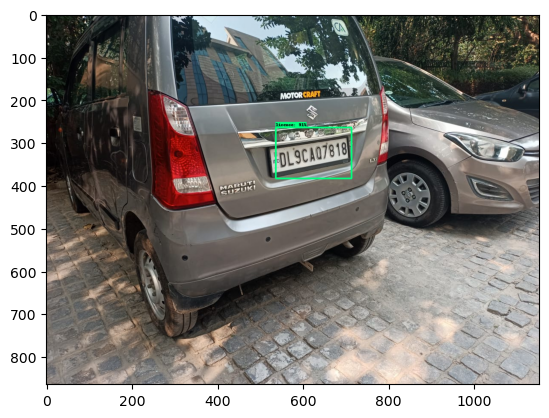

In [13]:
# img = cv2.imread(IMAGE_PATH)
# image_np = np.array(img)

# input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
# detections = detect_fn(input_tensor)

# num_detections = int(detections.pop('num_detections'))
# detections = {key: value[0, :num_detections].numpy()
#               for key, value in detections.items()}
# detections['num_detections'] = num_detections

# # detection_classes should be ints.
# detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

# label_id_offset = 1
# image_np_with_detections = image_np.copy()

# viz_utils.visualize_boxes_and_labels_on_image_array(
#             image_np_with_detections,
#             detections['detection_boxes'],
#             detections['detection_classes']+label_id_offset,
#             detections['detection_scores'],
#             category_index,
#             use_normalized_coordinates=True,
#             max_boxes_to_draw=5,
#             min_score_thresh=.8,
#             agnostic_mode=False)

# plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
# plt.show()

### live dection of plate code

In [23]:
cap = cv2.VideoCapture(1312)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.82,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

## Adding ocr

In [29]:
# detections have all the data which we have to used to apply oscr 
# To gid ocr where to apply
!conda list

# packages in environment at /home/dheeraj20194/.conda/envs/dheeraj_newip:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main  
_openmp_mutex             5.1                       1_gnu  
absl-py                   1.2.0                    pypi_0    pypi
apache-beam               2.41.0                   pypi_0    pypi
asttokens                 2.0.8                    pypi_0    pypi
astunparse                1.6.3                    pypi_0    pypi
avro-python3              1.10.2                   pypi_0    pypi
backcall                  0.2.0                    pypi_0    pypi
ca-certificates           2022.9.24            ha878542_0    conda-forge
cachetools                5.2.0                    pypi_0    pypi
certifi                   2022.6.15.2              pypi_0    pypi
charset-normalizer        2.1.1                    pypi_0    pypi
cloudpickle               2.2.0                    pypi_0    pypi
col

In [21]:
import easyocr

In [22]:
region_threshold = 0.6 # plate area threashold
detection_threshold = 0.8

In [23]:
def filter_text(region, ocr_result, region_threshold):
    rectangle_size = region.shape[0]*region.shape[1]
    
    plate = [] 
    for result in ocr_result:
        length = np.sum(np.subtract(result[0][1], result[0][0]))
        height = np.sum(np.subtract(result[0][2], result[0][1]))
        
        if length*height / rectangle_size > region_threshold:
            plate.append(result[1])
    return plate

In [25]:
def ocr_it(image, detections, detection_threshold, region_threshold):
    
    # Scores, boxes and classes above threhold
    scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    classes = detections['detection_classes'][:len(scores)]
    
    # Full image dimensions
    width = image.shape[1]
    height = image.shape[0]
    
    # Apply ROI filtering and OCR and applying on box corrdinate
    for idx, box in enumerate(boxes):
        roi = box*[height, width, height, width]
        region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
        reader = easyocr.Reader(['en'])
        ocr_result = reader.readtext(region)
         
        text = filter_text(region, ocr_result, region_threshold)
        
        # plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
        # plt.show()
        print(text)
        return text

In [19]:
# running on image
text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)

RuntimeError: CUDA error: out of memory

actual

In [ ]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [17]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

ValueError: in user code:

    File "/tmp/ipykernel_11378/1007919961.py", line 11, in detect_fn  *
        image, shapes = detection_model.preprocess(image)
    File "/home/dheeraj20194/.conda/envs/dheeraj_new_env/lib/python3.9/site-packages/object_detection/meta_architectures/ssd_meta_arch.py", line 484, in preprocess  *
        normalized_inputs, self._image_resizer_fn)
    File "/home/dheeraj20194/.conda/envs/dheeraj_new_env/lib/python3.9/site-packages/object_detection/utils/shape_utils.py", line 492, in resize_images_and_return_shapes  *
        outputs = static_or_dynamic_map_fn(
    File "/home/dheeraj20194/.conda/envs/dheeraj_new_env/lib/python3.9/site-packages/object_detection/utils/shape_utils.py", line 246, in static_or_dynamic_map_fn  *
        outputs = [fn(arg) for arg in tf.unstack(elems)]
    File "/home/dheeraj20194/.conda/envs/dheeraj_new_env/lib/python3.9/site-packages/object_detection/core/preprocessor.py", line 3330, in resize_image  *
        new_image = tf.image.resize_images(

    ValueError: 'images' must have either 3 or 4 dimensions.


In [ ]:
detections.keys()

# Apply OCR to Detection

In [ ]:
# !pip install easyocr

In [ ]:
# !pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
# import cv2 
# import numpy as np
# from matplotlib import pyplot as plt
# import easyocr
# %matplotlib inline

In [ ]:
# detection_threshold = 0.7

In [ ]:
# image = image_np_with_detections
# scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
# boxes = detections['detection_boxes'][:len(scores)]
# classes = detections['detection_classes'][:len(scores)]

In [ ]:
# width = image.shape[1]
# height = image.shape[0]

In [ ]:
# # Apply ROI filtering and OCR
# for idx, box in enumerate(boxes):
#     print(box)
#     roi = box*[height, width, height, width]
#     print(roi)
#     region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
#     reader = easyocr.Reader(['en'])
#     ocr_result = reader.readtext(region)
#     print(ocr_result)
#     plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))

In [ ]:
# for result in ocr_result:
#     print(np.sum(np.subtract(result[0][2],result[0][1])))
#     print(result[1])

# OCR Filtering

In [ ]:
# region_threshold = 0.05

In [ ]:
# filter_text(region, ocr_result, region_threshold)

# Bring it Together

In [ ]:
# region_threshold = 0.6

In [ ]:
# text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)

# Save Results

In [28]:
# import csv
# import uuid

# def save_results(text,regiom ,csv_filename, folder_path):
#     img_name = '{}.jpg'.format(uuid.uuid1())
    
#     cv2.imwrite(os.path.join(folder_path, img_name), region)
    
#     with open(csv_filename, mode='a', newline='') as f:
#         csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#         csv_writer.writerow([img_name, text])

In [ ]:
# region

In [ ]:
# save_results(text, region, 'detection_results.csv', 'Detection_Images')

# 10. Real Time Detections from your Webcam

In [ ]:
# !pip uninstall opencv-python-headless -y
# with save result added inside it

In [36]:
# import socket, cv2, pickle, struct
# import numpy as np
# import matplotlib.pyplot as plt

In [ ]:
# # create socket
# client_socket = socket.socket(socket.AF_INET,socket.SOCK_STREAM)
# host_ip = '192.168.172.249'
# port = 2010
# client_socket.connect((host_ip, port))
# data = b""
# payload_size = struct.calcsize("Q")

# while True:
# 	while len(data) < payload_size:
# 		packet = client_socket.recv(4*1024)
# 		if not packet: break
# 		data+=packet
# 	packed_msg_size = data[:payload_size]
# 	data = data[payload_size:]
# 	msg_size = struct.unpack("Q", packed_msg_size)[0]
	
# 	while len(data) < msg_size:
# 		data += client_socket.recv(4*1024)
# 	frame_data = data[:msg_size]
# 	data  = data[msg_size:]
# 	frame = pickle.loads(frame_data)

# 	image_np = np.array(frame)
# 	input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
# 	detections = detect_fn(input_tensor)

# 	num_detections = int(detections.pop('num_detections'))
# 	detections = {key: value[0, :num_detections].numpy()
# 				for key, value in detections.items()}
# 	detections['num_detections'] = num_detections

# 	# detection_classes should be ints.
# 	detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

# 	label_id_offset = 1
# 	image_np_with_detections = image_np.copy()

# 	viz_utils.visualize_boxes_and_labels_on_image_array(
# 				image_np_with_detections,
# 				detections['detection_boxes'],
# 				detections['detection_classes']+label_id_offset,
# 				detections['detection_scores'],
# 				category_index,
# 				use_normalized_coordinates=True,
# 				max_boxes_to_draw=5,
# 				min_score_thresh=.8,
# 				agnostic_mode=False)
				
# 	region_threshold = 0.6
# 	detection_threshold = 0.7
# 	text = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)
# 	save_results(text, 'realtimeresults.csv', 'Detection_Images')

# 	plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
# 	plt.show()

# client_socket.close()

# 10. Freezing the Graph

In [ ]:
# FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [ ]:
# command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [ ]:
# print(command)

In [ ]:
# !{command}

# 11. Conversion to TFJS

In [ ]:
# !pip install tensorflowjs

In [ ]:
# command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [ ]:
# print(command)

In [ ]:
# !{command}

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [ ]:
# TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [ ]:
# command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [ ]:
# print(command)

In [ ]:
# !{command}

In [ ]:
# FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
# TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [ ]:
# command = "tflite_convert \
# --saved_model_dir={} \
# --output_file={} \
# --input_shapes=1,300,300,3 \
# --input_arrays=normalized_input_image_tensor \
# --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
# --inference_type=FLOAT \
# --allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [ ]:
# print(command)

In [ ]:
# !{command}

# 13. Zip and Export Models 

In [ ]:
# !tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')